In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('paths.sh')

In [5]:
file.path(str_replace(out_d, '/scratch', '/oak/stanford'), 'residual_regression.tsv.gz') %>%
fread() %>%
rename_with(function(x){str_replace(x, '#', '')}, starts_with("#")) ->df


In [8]:
df %>% filter(model == 'array', variable == 'Array') -> array_df


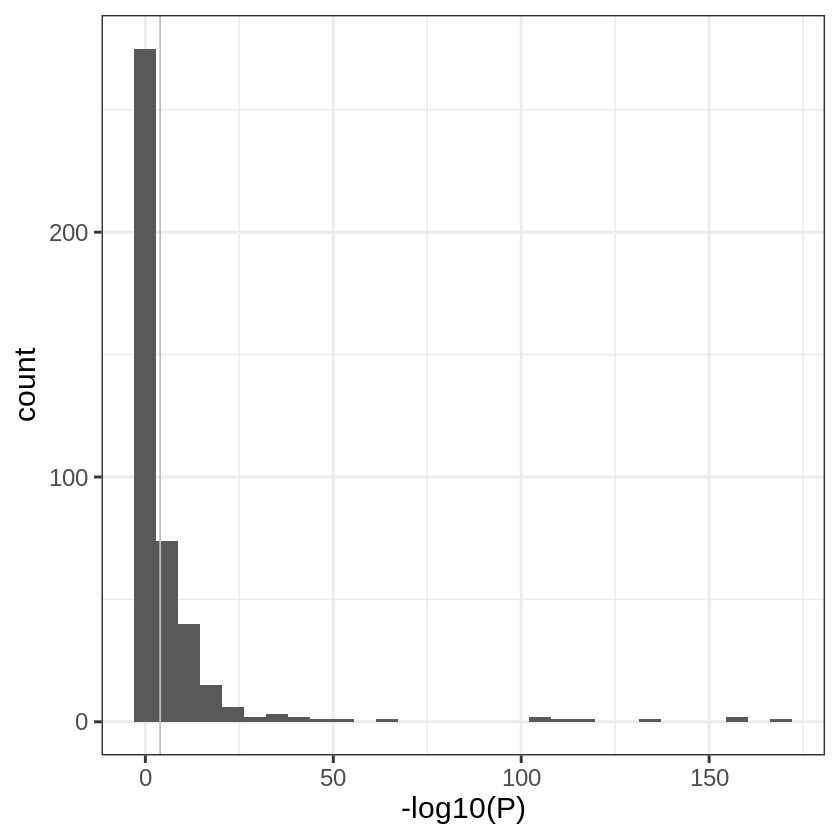

In [13]:
array_df %>%
ggplot(aes(x = -log10(P))) +
geom_histogram(bins=30) +
theme_bw(base_size=18) +
geom_vline(xintercept = -log10(0.05/428), color='gray')


In [14]:
df %>% head

model,phenotype,variable,estimate,SE,z_or_t_value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
array,INI50,(Intercept),167.6431286,0.1061101,1579.897715,0.000000e+00
array,INI50,Array,0.1176523,0.1126178,1.044704,2.961636e-01
center,INI50,(Intercept),167.4369383,0.1165463,1436.656503,0.000000e+00
center,INI50,center_id10003,2.8534126,1.2219575,2.335116,1.954028e-02
center,INI50,center_id11001,-0.1897454,0.2458922,-0.771661,4.403180e-01
center,INI50,center_id11002,1.5770827,0.2362518,6.675433,2.484102e-11


In [15]:
df %>% filter(model == 'center', variable != '(Intercept)') -> center_df



In [17]:
center_df %>% dim

[1] 8977    7

Warning message:
“Removed 118 rows containing non-finite values (stat_bin).”


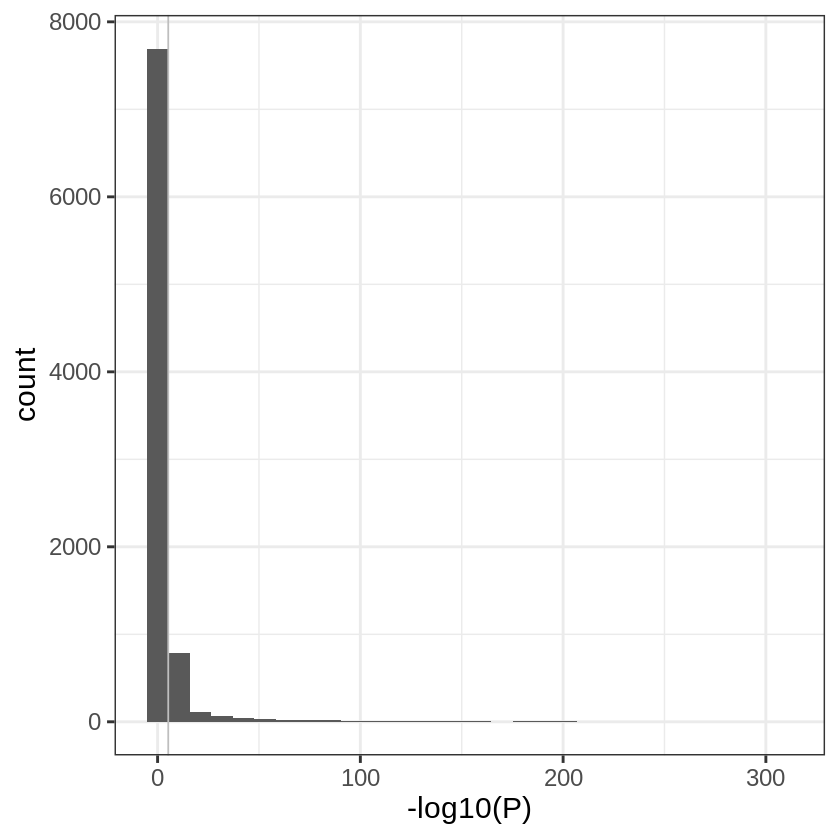

In [18]:
center_df %>%
ggplot(aes(x = -log10(P))) +
geom_histogram(bins=30) +
theme_bw(base_size=18) +
geom_vline(xintercept = -log10(0.05/8977), color='gray')


In [21]:
-log10(0.05/8977)

[1] 5.254161

In [20]:
center_df %>%
arrange(P) %>% head(50)

model,phenotype,variable,estimate,SE,z_or_t_value,P
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
center,INI4080,center_id11004,-57.136521,0.76984194,-74.21851,0
center,INI4080,center_id11005,-74.946294,0.78697755,-95.23308,0
center,INI3147,center_id11001,-75.516133,0.96192898,-78.50489,0
center,INI3147,center_id11002,-74.888124,0.92447259,-81.00632,0
center,INI3147,center_id11004,-63.894760,0.83695306,-76.34211,0
center,INI3147,center_id11011,-32.289169,0.65151170,-49.56038,0
center,INI3147,center_id11014,-106.875494,0.71026444,-150.47282,0
center,INI3147,center_id11016,-67.666021,0.70136460,-96.47767,0
center,INI3147,center_id11017,-106.875494,0.79755413,-134.00406,0


In [24]:
center_df %>%
filter(P < 1e-5) %>% count(phenotype) %>% arrange(-n)

phenotype,n
<chr>,<int>
INI4100,20
INI4101,20
INI4104,20
INI4106,20
INI4119,20
INI4120,20
INI4123,20
INI4125,20
INI5084,19
